### ChestX-ray Image for Classification (Pneumonea vs Normal)
#### DataSet: https://data.mendeley.com/datasets/rscbjbr9sj/2

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./chest_xray/"
sz=299
arch=resnext50
bs=28

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
os.listdir(PATH)

['test', 'valid', 'models', 'train', 'tmp']

In [6]:
os.listdir(f'{PATH}valid')

['PNEUMONIA', 'NORMAL']

In [7]:
files = os.listdir(f'{PATH}valid/NORMAL')[:2]
files

['NORMAL2-IM-0300-0001.jpeg', 'NORMAL2-IM-0102-0001.jpeg']

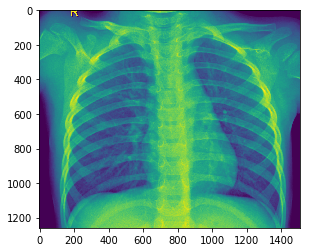

In [8]:
img = plt.imread(f'{PATH}valid/NORMAL/{files[0]}')
plt.imshow(img);

In [9]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [10]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 23/23 [00:18<00:00,  1.27it/s]


In [11]:
learn.fit(1e-2, 1)
learn.precompute=False

epoch      trn_loss   val_loss   accuracy                    
    0      0.165793   0.580741   0.8125    



In [12]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.164996   0.404745   0.849359  
    1      0.146728   0.394188   0.854167                    



[array([0.39419]), 0.8541666645652208]

In [13]:
learn.unfreeze()
learn.bn_freeze(True)
lr=np.array([1e-5,1e-4,1e-2])

In [14]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.115717   0.493713   0.855769  
    1      0.087127   0.479862   0.875                        
    2      0.071303   0.46643    0.878205                     



[array([0.46643]), 0.8782051293513714]

In [26]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8493589743589743

In [27]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[143  91]
 [  3 387]]


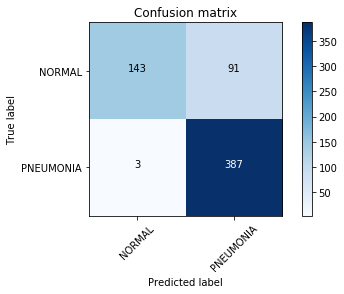

In [28]:
plot_confusion_matrix(cm, data.classes)